In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [240]:
df = pd.read_csv('milano_house_prices_raw_data_cleaned.csv', index_col=0)
df

,price_euro,number_rooms,area_m2,bathrooms,floor_number,description,Reference and listing Date,contract,type,total building floors,...,heating,Air conditioner,Energy Efficiency,city,neighborhood,street,URL,with_disabled_access,with_lift,listing Date
0,289000.0,3,100,1,4,Si propone in vendita in esclusiva un ampio ap...,CNB6 - 10/24/2023,sale,Apartment | Full ownership | Stately property ...,7.0,...,"Central, with radiators, powered by methane","Central, cold",F≥ 175 kWh/m² year,Milan,Baggio,Via Val Cannobina,https://www.immobiliare.it/en/annunci/106903681/,1.0,1.0,2023-10-24
1,398000.0,2,78,1,2,"RIF: Divina Servizi Immobiliari di Seregno, Pi...",EK-106888689 - 10/24/2023,sale,Apartment | Full ownership | Stately property ...,3.0,...,"Central, with radiators, gas powered",NaN,F232.6 kWh/m² year,Milan,Argonne - Corsica,Via Druso,https://www.immobiliare.it/en/annunci/106888689/,0.0,1.0,2023-10-24
2,420000.0,3,85,1,2,Zona Crescenzago e più precisamente in Via Pri...,CS- Vittorelli - 10/24/2023,sale,Apartment | Full ownership | Stately property ...,5.0,...,"Central, floor heating, gas powered",System predisposition,"A1≥ 3,51 kWh/m² year",Milan,Crescenzago,Via Jacopo Vittorelli,https://www.immobiliare.it/en/annunci/106892137/,1.0,1.0,2023-10-24
3,780000.0,3,80,1,5,Ref: ST6 - Tempocasa in Via Bergamo 11 offers ...,ST6 - 10/24/2023,sale,Apartment | Full ownership | Stately property ...,5.0,...,"Independent, with radiators, powered by methane","Independent, cold",E109 kWh/m² year,Milan,Porta Romana - Medaglie d'Oro,Via Gerolamo Tiraboschi 6,https://www.immobiliare.it/en/annunci/106889543/,0.0,1.0,2023-10-24
4,395000.0,2,50,1,4,Rif: D319 - STAI CERCANDO UN BILOCALE RISTRUTT...,D319 - 10/24/2023,sale,Apartment | Full ownership | Stately property ...,4.0,...,"Independent, with radiators, powered by methane","Independent, cold",G188.82 kWh/m² year,Milan,Porta Vittoria,Corso XXII Marzo 39,https://www.immobiliare.it/en/annunci/106894335/,0.0,1.0,2023-10-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1611,134000.0,2,45,1,0,"via carolina invernizio - in a 90s building, w...",134 INVERNIZIO - 10/14/2023,sale,Apartment | Full ownership | Medium property c...,6.0,...,"Independent, air heating, powered by heat pump","Independent, cold/hot",F≥ 175 kWh/m² year,Milan,Vialba,Via Carolina Invernizio,https://www.immobiliare.it/en/annunci/106660647/,1.0,1.0,2023-10-14
1612,369000.0,3,90,2,8,Agenzia Tecnocasa propone in Vendita Trilocale...,60812383 - 10/14/2023,sale,Apartment | Full ownership | Stately property ...,10.0,...,"Central, with radiators, powered by methane","Independent, cold/hot",D76.45 kWh/m² year,Milan,Giambellino,Via Francesco Gonin,https://www.immobiliare.it/en/annunci/106659427/,1.0,1.0,2023-10-14
1613,160000.0,2,54,1,0,"via carolina invernizio - in a 90s building, w...",160 INVERNIZIO - 10/14/2023,sale,Apartment | Full ownership | Medium property c...,6.0,...,"Independent, air heating, powered by heat pump","Independent, cold/hot",F≥ 175 kWh/m² year,Milan,Vialba,Via Carolina Invernizio,https://www.immobiliare.it/en/annunci/106660639/,1.0,1.0,2023-10-14
1614,299000.0,2,50,1,5,ARE YOU LOOKING FOR A PERFECT TWO-ROOM APARTME...,sabotino7 - 10/14/2023,sale,Apartment | Full ownership | Stately property ...,5.0,...,"Central, with radiators",NaN,F≥ 175 kWh/m² year,Milan,Porta Romana - Medaglie d'Oro,Viale Sabotino,https://www.immobiliare.it/en/annunci/106656557/,0.0,1.0,2023-10-14


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1616 entries, 0 to 1615
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   price_euro                  1616 non-null   float64
 1   number_rooms                1616 non-null   int64  
 2   area_m2                     1616 non-null   int64  
 3   bathrooms                   1616 non-null   int64  
 4   floor_number                1616 non-null   object 
 5   description                 1616 non-null   object 
 6   Reference and listing Date  1613 non-null   object 
 7   contract                    1616 non-null   object 
 8   type                        1616 non-null   object 
 9   total building floors       1541 non-null   float64
 10  availability                1263 non-null   object 
 11  other features              1607 non-null   object 
 12  condominium fees            1610 non-null   float64
 13  deposit                     1458 non-n

In [242]:
# Most expensive apartment
df[df['price_euro'] == df['price_euro'].max()]

,price_euro,number_rooms,area_m2,bathrooms,floor_number,description,Reference and listing Date,contract,type,total building floors,...,heating,Air conditioner,Energy Efficiency,city,neighborhood,street,URL,with_disabled_access,with_lift,listing Date
33,6000000.0,5,50000,3,0,MEDIATORI GROUP CASTELSARDO PROPONE IN VENDITA...,315632 - 10/24/2023,sale,Building | Luxury property,1.0,...,"Independent, air heating, powered by heat pump",System predisposition,G≥ 175 kWh/m² year,Milan,Duomo,Piazza del Duomo,https://www.immobiliare.it/en/annunci/106892483/,1.0,0.0,2023-10-24


In [243]:
# Least expensive apartment
df[df['price_euro'] == df['price_euro'].min()]

,price_euro,number_rooms,area_m2,bathrooms,floor_number,description,Reference and listing Date,contract,type,total building floors,...,heating,Air conditioner,Energy Efficiency,city,neighborhood,street,URL,with_disabled_access,with_lift,listing Date
1604,38750.0,3,40,1,1,GRIMALDI PORTA ROMANA PROPONE ALL’ASTA IN VIA ...,GPRAS/VSS/22/36 - 10/15/2023,sale,Apartment,NaN,...,NaN,NaN,G175 kWh/m² year,Milan,Dergano,"Via Valassina, 42",https://www.immobiliare.it/en/annunci/106667325/,0.0,0.0,2023-10-15


In [244]:
# Average price in each neighborhood
average_prices = df.groupby('neighborhood')['price_euro'].mean().astype(int).sort_values(ascending=False)
average_prices

neighborhood
Duomo                       3312500
Palestro                    2038800
Missori                     1870000
Melchiorre Gioia            1865000
San Babila                  1785000
                             ...   
Quarto Oggiaro               155629
Quintosole - Chiaravalle     140000
Ponte Lambro                 130533
Quinto Romano                 99111
Figino                        85000
Name: price_euro, Length: 139, dtype: int32

In [245]:
print(f'Neighborhood with the highest prices: {average_prices.index[0]} | Average prices: {average_prices[0]} Euros')
print(f'Neighborhood with the lowest prices: {average_prices.index[-1]} | Average prices: {average_prices[-1]} Euros')

Neighborhood with the highest prices: Duomo | Average prices: 3312500 Euros
Neighborhood with the lowest prices: Figino | Average prices: 85000 Euros


Text(0.5, 1.0, 'Average Prices in Each Neighborhood')

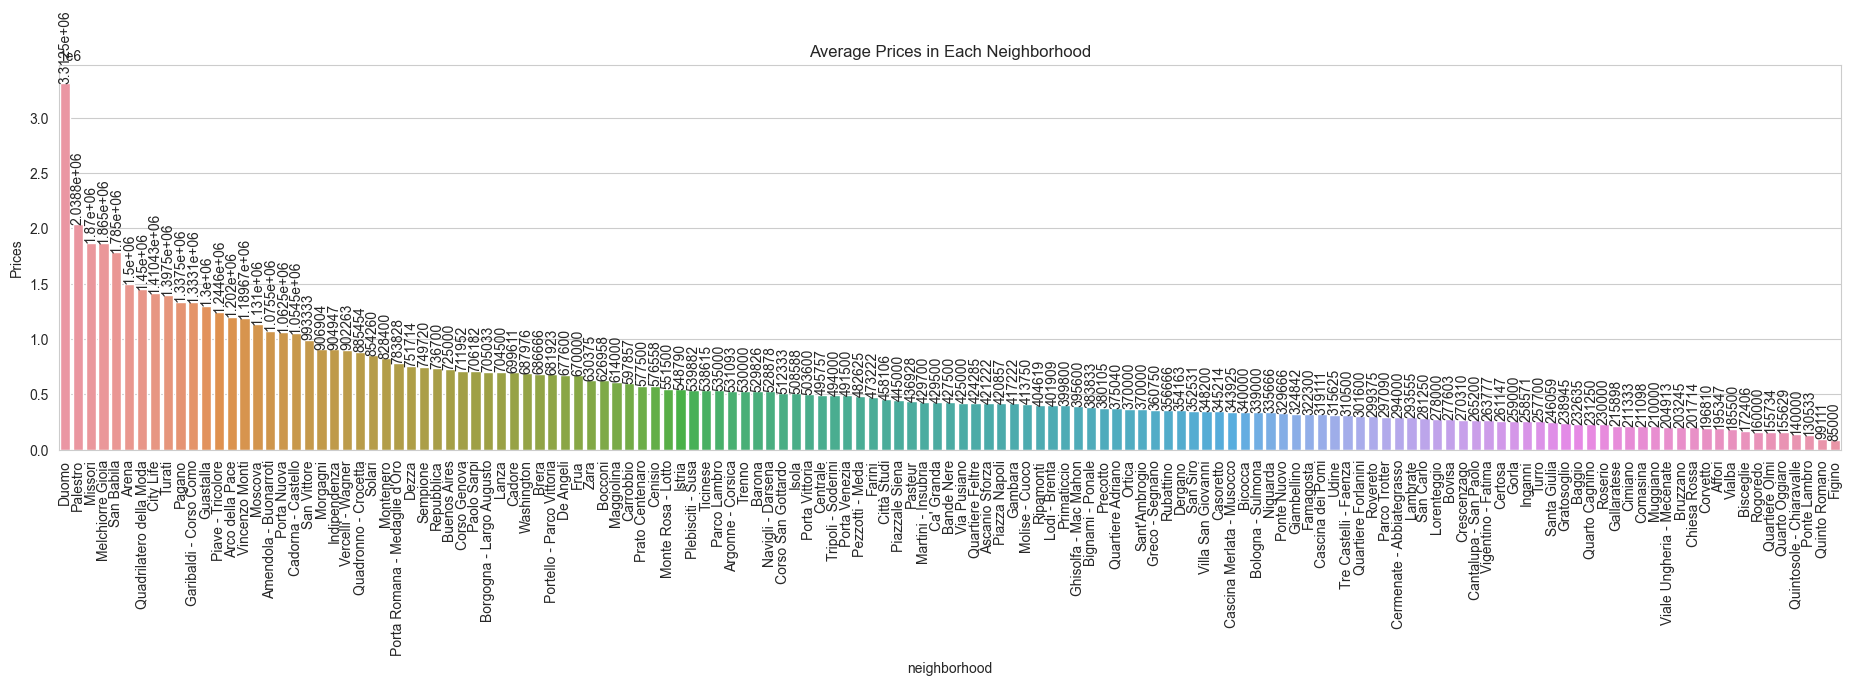

In [246]:
# Average price in Each Neighborhood
plt.figure(figsize=(23, 5))
ax = sns.barplot(x=average_prices.index, y=average_prices.values)
ax.bar_label(ax.containers[0], rotation=90)
plt.xticks(rotation=90)
plt.ylabel('Prices')
plt.title('Average Prices in Each Neighborhood')

Prices of most apartments are between: 245000.0 - 609250.0


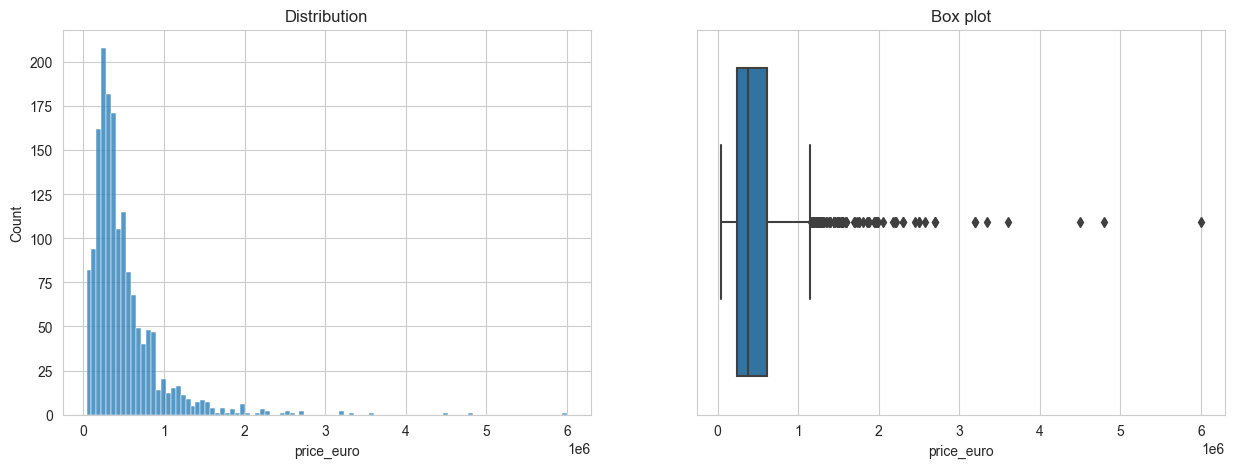

In [247]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax = ax.flatten()

sns.histplot(df["price_euro"], ax=ax[0])
ax[0].set_title('Distribution')

sns.boxplot(x=df["price_euro"], ax=ax[1])
ax[1].set_title('Box plot')

print(f'Prices of most apartments are between: {np.percentile(df["price_euro"], 25)} - {np.percentile(df["price_euro"], 75)}')

Text(0.5, 1.0, 'Counts of each category')

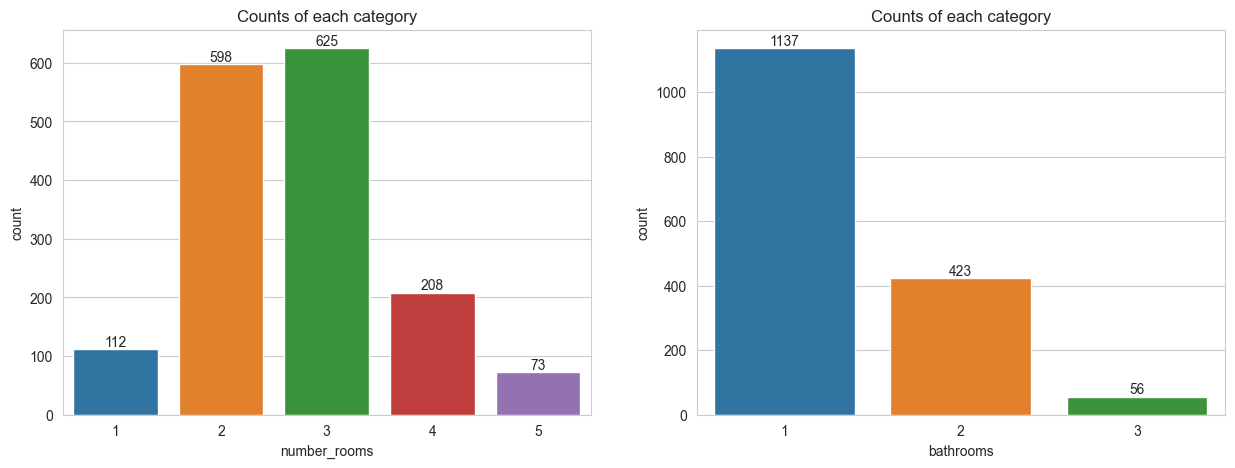

In [248]:
_, ax = plt.subplots(1, 2, figsize=(15, 5))
ax = ax.flatten()

ax[0] = sns.countplot(data=df, x='number_rooms', ax=ax[0])
ax[0].bar_label(ax[0].containers[0])
ax[0].set_title('Counts of each category')

ax[1] = sns.countplot(data=df, x='bathrooms', ax=ax[1])
ax[1].bar_label(ax[1].containers[0])
ax[1].set_title('Counts of each category')

In [249]:
df['area_m2'].value_counts()

area_m2
90     72
50     70
80     66
60     63
100    57
       ..
136     1
245     1
153     1
164     1
126     1
Name: count, Length: 170, dtype: int64

In [250]:
# Price of meter squared dor each apartment
df['price_m2'] = df['price_euro'] / df['area_m2']
df['price_m2']

0       2890.000000
1       5102.564103
2       4941.176471
3       9750.000000
4       7900.000000
           ...     
1611    2977.777778
1612    4100.000000
1613    2962.962963
1614    5980.000000
1615    4787.234043
Name: price_m2, Length: 1616, dtype: float64

In [251]:
# Apartment with the highest price for meter squared
print(f'Price for meter squared: {df["price_m2"].max():.2f}')
print(df.loc[df["price_m2"].argmax(), ['URL', 'price_euro', 'area_m2', 'city', 'neighborhood', 'street']])

Price for meter squared: 22333.33
URL             https://www.immobiliare.it/en/annunci/106783753/
price_euro                                             3350000.0
area_m2                                                      150
city                                                       Milan
neighborhood                                    Melchiorre Gioia
street                             Via Giovanni Battista Pirelli
Name: 662, dtype: object


In [252]:
# Apartment with the lowest price for meter squared
print(f'Price for meter squared: {df["price_m2"].min():.2f}')
print(df.loc[df["price_m2"].argmin(), ['URL', 'price_euro', 'area_m2', 'city', 'neighborhood', 'street']])

Price for meter squared: 120.00
URL             https://www.immobiliare.it/en/annunci/106892483/
price_euro                                             6000000.0
area_m2                                                    50000
city                                                       Milan
neighborhood                                               Duomo
street                                          Piazza del Duomo
Name: 33, dtype: object


In [253]:
# Average meter squared prices in each neighborhood
average_prices_m2 = df.groupby('neighborhood')['price_m2'].mean().sort_values(ascending=False)
average_prices_m2

neighborhood
Quadrilatero della Moda     20714.285714
Melchiorre Gioia            14559.523810
Palestro                    13066.407195
Borgogna - Largo Augusto    12902.335859
Turati                      12873.575909
                                ...     
Figino                       2023.809524
Quartiere Olmi               1825.364586
Quarto Oggiaro               1809.767452
Quinto Romano                1491.313742
Ponte Lambro                 1329.572072
Name: price_m2, Length: 139, dtype: float64

In [254]:
print(f'Neighborhood with the highest prices: {average_prices_m2.index[0]} | Average m2 prices: {average_prices_m2[0]:.2f} Euros')
print(f'Neighborhood with the lowest prices: {average_prices_m2.index[-1]} | Average m2 prices: {average_prices_m2[-1]:.2f} Euros')

Neighborhood with the highest prices: Quadrilatero della Moda | Average m2 prices: 20714.29 Euros
Neighborhood with the lowest prices: Ponte Lambro | Average m2 prices: 1329.57 Euros


Text(0.5, 1.0, 'Average Meter Squared Prices in Each Neighborhood')

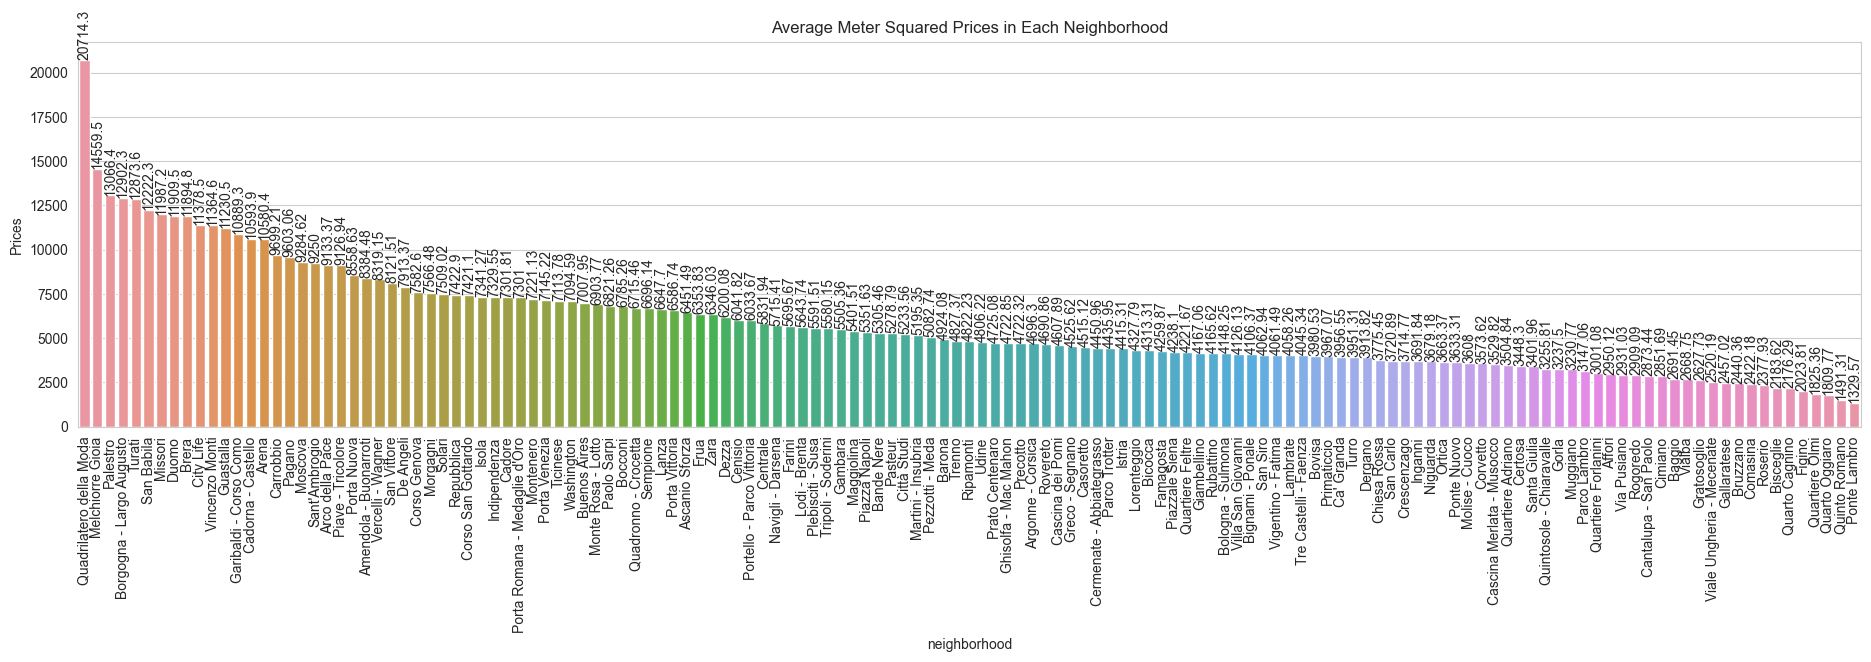

In [255]:
# Average Meter Squared Prices in Each Neighborhood
plt.figure(figsize=(23, 5))
ax = sns.barplot(x=average_prices_m2.index, y=average_prices_m2.values)
ax.bar_label(ax.containers[0], rotation=90)
plt.xticks(rotation=90)
plt.ylabel('Prices')
plt.title('Average Meter Squared Prices in Each Neighborhood')

Text(0.5, 1.0, 'Box plot')

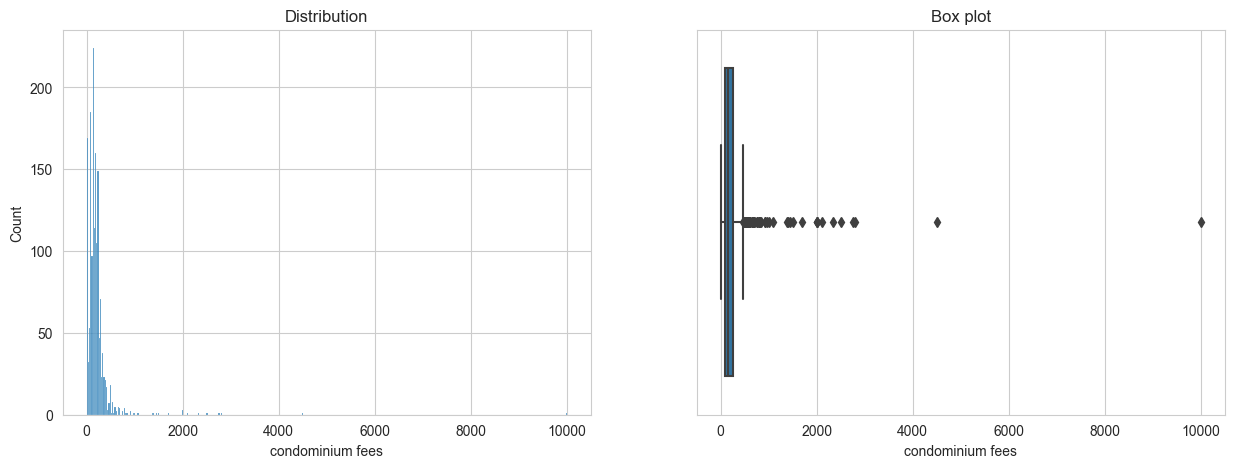

In [256]:
_, ax = plt.subplots(1, 2, figsize=(15, 5))
ax = ax.flatten()

sns.histplot(df["condominium fees"], ax=ax[0])
ax[0].set_title('Distribution')

sns.boxplot(x=df["condominium fees"], ax=ax[1])
ax[1].set_title('Box plot')

In [257]:
# Average condominium fees in each neighborhood
average_condominium_fees = df.groupby('neighborhood')['condominium fees'].mean().sort_values(ascending=False).dropna()
average_condominium_fees = average_condominium_fees[average_condominium_fees > 0]
average_condominium_fees

neighborhood
Piave - Tricolore           1237.300000
Quartiere Forlanini          927.666667
Melchiorre Gioia             900.000000
Palestro                     811.750000
San Babila                   660.000000
                               ...     
Parco Trotter                 95.454545
Vigentino - Fatima            92.937500
De Angeli                     85.000000
Barona                        60.909091
Quintosole - Chiaravalle      50.000000
Name: condominium fees, Length: 131, dtype: float64

In [258]:
print(f'Neighborhood with the condominium fees: {average_condominium_fees.index[0]} | Average condominium fees: {average_condominium_fees[0]:.2f} Euros')
print(f'Neighborhood with the condominium fees: {average_condominium_fees.index[-1]} | Average condominium fees: {average_condominium_fees[-1]:.2f} Euros')

Neighborhood with the condominium fees: Piave - Tricolore | Average condominium fees: 1237.30 Euros
Neighborhood with the condominium fees: Quintosole - Chiaravalle | Average condominium fees: 50.00 Euros


Text(0.5, 1.0, 'Average condominium fees in Each Neighborhood')

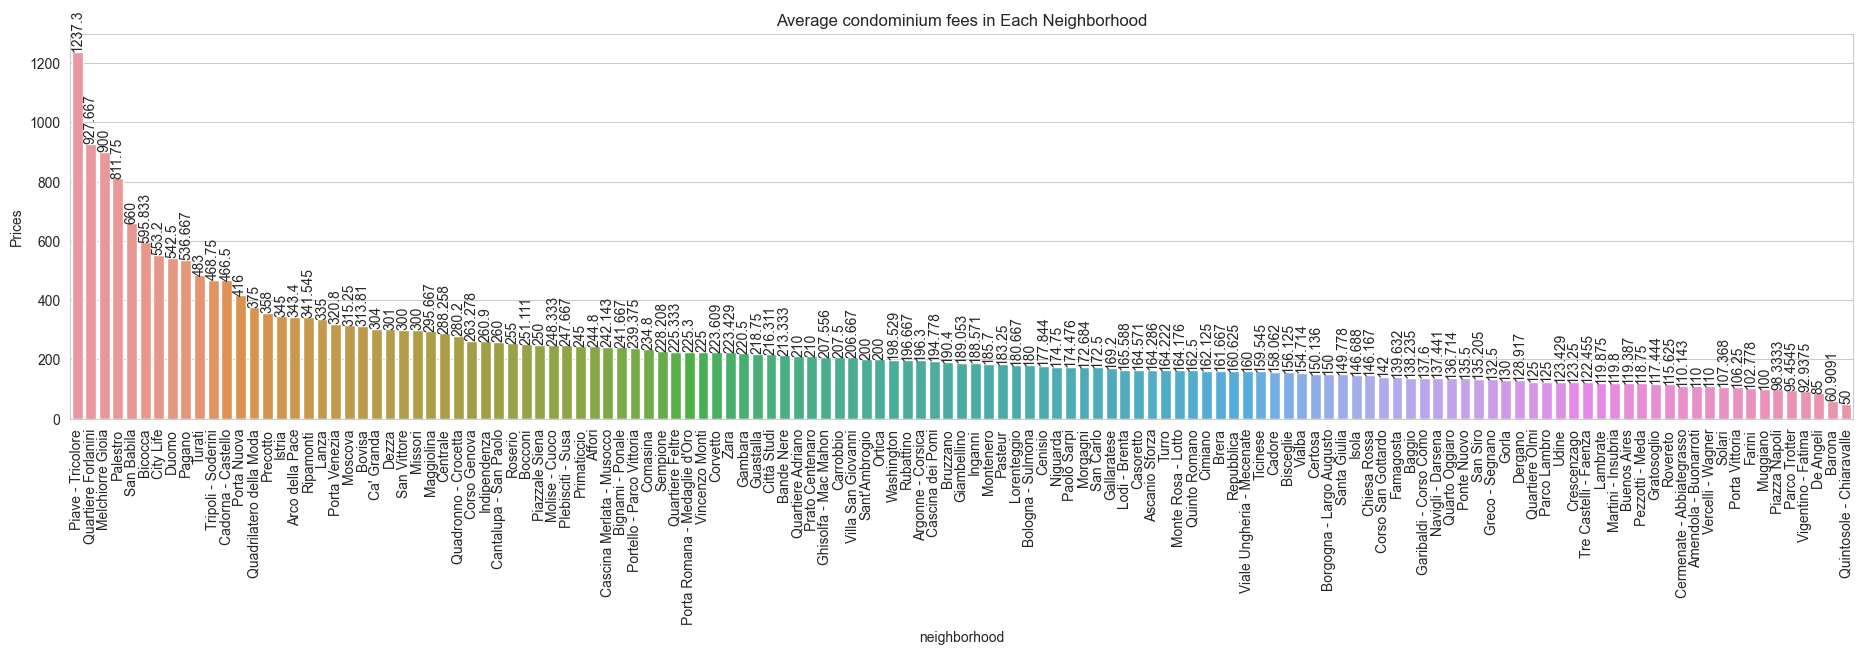

In [259]:
# Average condominium fees in Each Neighborhood
plt.figure(figsize=(23, 5))
ax = sns.barplot(x=average_condominium_fees.index, y=average_condominium_fees.values)
ax.bar_label(ax.containers[0], rotation=90)
plt.xticks(rotation=90)
plt.ylabel('Prices')
plt.title('Average condominium fees in Each Neighborhood')

In [260]:
df['neighborhood'].value_counts()

neighborhood
Città Studi                83
San Siro                   64
Affori                     41
Navigli - Darsena          41
Corvetto                   37
                           ..
Quadrilatero della Moda     1
Parco Lambro                1
Missori                     1
Gorla                       1
Ortica                      1
Name: count, Length: 139, dtype: int64

Text(0.5, 1.0, 'Number of Announcements in Each Neighborhood')

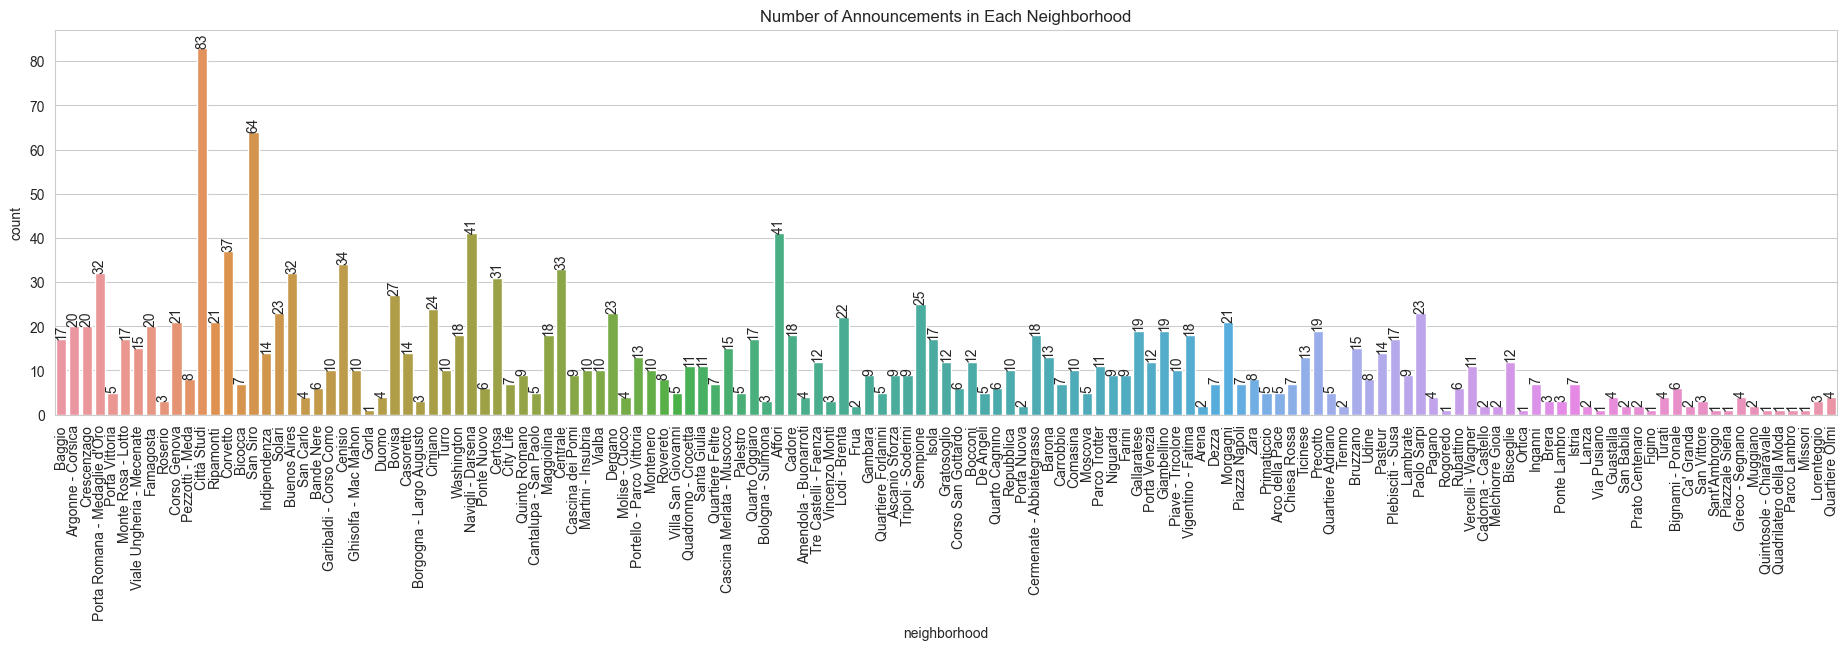

In [261]:
# Apartments available in each neighborhood
plt.figure(figsize=(23, 5))
ax = sns.countplot(data=df, x='neighborhood')
ax.bar_label(ax.containers[0], rotation=90)
plt.xticks(rotation=90)
plt.title('Number of Announcements in Each Neighborhood')

In [262]:
df['with_lift'].value_counts()

with_lift
1.0    1254
0.0     362
Name: count, dtype: int64

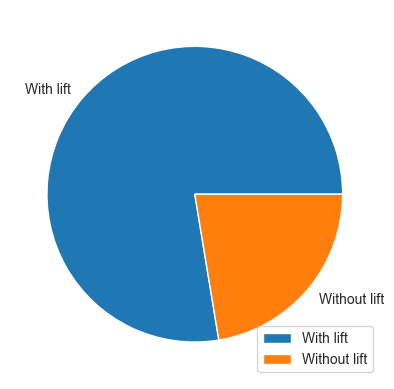

In [263]:
# Apartments With lift
my_labels  = ['With lift', 'Without lift']
plt.pie(df['with_lift'].value_counts(), labels=my_labels)
plt.legend()

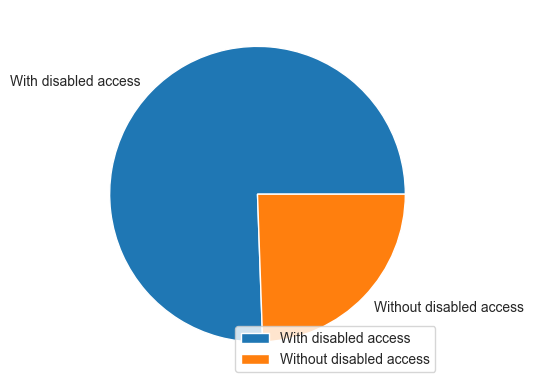

In [264]:
# Apartments with disabled access
my_labels  = ['With disabled access', 'Without disabled access']
plt.pie(df['with_disabled_access'].value_counts(), labels=my_labels)
plt.legend()